In [94]:
!pip install seaborn

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
import seaborn as sns
# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_csv('sorted_insider_trading_data.csv')

In [2]:
values=data.drop("is_insider",axis=1)
labels=data["is_insider"]

In [3]:
values=values[["% SHAREHOLDING (PRIOR) \n","NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n","VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n","NO. OF SECURITY (POST) \n"]]


In [4]:
values.replace(to_replace="-",value=0,inplace=True)
values.replace(to_replace="Nil",value=0,inplace=True)
values=values.astype("float")
values.dtypes

% SHAREHOLDING (PRIOR) \n                    float64
NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n    float64
VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n    float64
NO. OF SECURITY (POST) \n                    float64
dtype: object

In [5]:
#values=values.drop('NUMBER OF UNITS/CONTRACT LOT SIZE (SELL) \n',axis=1)
values=values.fillna(0)
values

,% SHAREHOLDING (PRIOR) \n,NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n,VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n,NO. OF SECURITY (POST) \n
0,0.00,0.0,0.0,5000.0
1,0.03,0.0,0.0,30000.0
2,0.03,0.0,0.0,30000.0
3,0.04,0.0,0.0,49248.0
4,1.13,38596.0,193536.0,1137500.0
...,...,...,...,...
504,4.57,3899.0,6735147.0,47111320.0
505,4.04,0.0,0.0,41938431.0
506,3.85,0.0,0.0,40087987.0
507,0.00,0.0,0.0,2716820.0


In [6]:
values.isna().sum()

% SHAREHOLDING (PRIOR) \n                    0
NO. OF SECURITIES (ACQUIRED/DISPLOSED) \n    0
VALUE OF SECURITY (ACQUIRED/DISPLOSED) \n    0
NO. OF SECURITY (POST) \n                    0
dtype: int64

In [98]:
cm=pd.DataFrame(cm)
cm

ValueError: DataFrame constructor not properly called!

In [9]:
sequential_model=Sequential()
sequential_model.add(Dense(units=128, activation='relu', input_shape=(4,)))
sequential_model.add(Dense(units=64, activation='relu'))
sequential_model.add(Dense(units=32, activation='relu'))
sequential_model.add(Dense(units=16, activation='relu'))
sequential_model.add(Dense(units=2,activation='softmax'))
sequential_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tf=sequential_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5258 - val_loss: 0.6904 - val_accuracy: 0.6275
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5774 - val_loss: 0.6826 - val_accuracy: 0.6275
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.5774 - val_loss: 0.6741 - val_accuracy: 0.6275
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5774 - val_loss: 0.6663 - val_accuracy: 0.6275
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.5971 - val_loss: 0.6600 - val_accuracy: 0.6275
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.5921 - val_loss: 0.6550 - val_accuracy: 0.6373
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6118 - val_loss: 0.6440 - val_accuracy: 0.6275
Epoch 8/30
13/13 [=

4/4 [==============================] - 0s 2ms/step


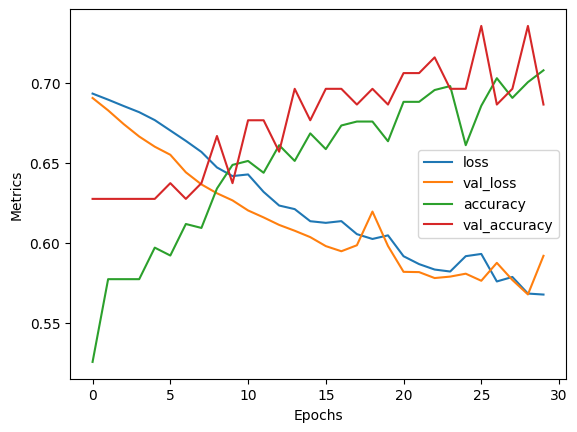

In [10]:
preds=sequential_model.predict(x_test)
plt.plot(tf.history['loss'])
plt.plot(tf.history['val_loss'])
plt.plot(tf.history['accuracy'])
plt.plot(tf.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(['loss', 'val_loss','accuracy','val_accuracy'])
plt.show()

In [11]:
preds=np.argmax(preds,axis=1)
accuracy = accuracy_score(y_test, preds)
confusion_matrix_result = confusion_matrix(y_test, preds)
print(accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report(y_test, preds))

0.6862745098039216
Confusion Matrix:
 [[ 8 31]
 [ 1 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.21      0.33        39
           1       0.67      0.98      0.79        63

    accuracy                           0.69       102
   macro avg       0.78      0.59      0.56       102
weighted avg       0.75      0.69      0.62       102

